<a href="https://colab.research.google.com/github/RAS-95/Encryptix/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
import numpy
import plotly

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sms = pandas.read_csv("spam.csv", encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms=sms[['v1','v2']]
sms.columns=['isSpam','text']

In [ ]:
def transformSpamColumn(x):
    if x=='ham':
        return 0
    return 1

In [ ]:
sms.head()

,isSpam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_distribution=sms['isSpam'].value_counts()
spam_distribution

isSpam
ham     4825
spam     747
Name: count, dtype: int64

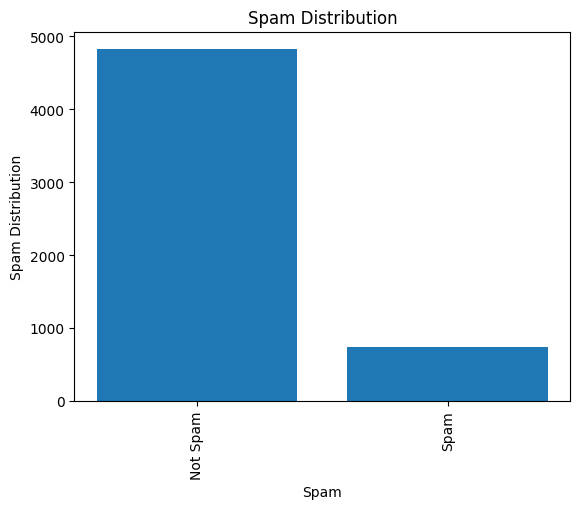

In [ ]:
Index = [1,2]
plt.bar(Index, spam_distribution)
plt.xticks(Index, ['Not Spam','Spam'],rotation=90)
plt.ylabel('Spam Distribution')
plt.xlabel('Spam')
plt.title('Spam Distribution')
plt.show()

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS  # For generating word clouds and a set of stop words
import re  # For regular expression operations
from nltk.corpus import stopwords  # For obtaining stop words
import matplotlib.pyplot as plt  # For plotting the word cloud

In [ ]:
# Function to clean and process the words from a raw sentence
def cleanedWords(raw_sentence):
    # Replace all non-letter characters with a space
    letters_only = re.sub("[^a-zA-Z]", " ", raw_sentence)
    # Convert all letters to lowercase and split the sentence into words
    words = letters_only.lower().split()
    # Get a set of English stop words
    stops = set(stopwords.words("english"))
    # Remove stop words from the list of words
    meaningful_words = [w for w in words if w not in stops]
    return meaningful_words

In [ ]:
def getWordCloud(df, isSpam):
    df=df[df['isSpam'] == isSpam]
    words = ' '.join(df['text'])
    cleaned_word = " ".join(cleanedWords(words))
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     )
    wordcloud.generate(cleaned_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
import nltk

In [ ]:
def sms_to_words(raw_sms):
    return( " ".join( cleanedWords(raw_sms) ))

In [ ]:
sms['clean_text']=sms['text'].apply(lambda x: sms_to_words(x))

In [ ]:
sms.head()

,isSpam,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [ ]:
train,test = train_test_split(sms,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train['clean_text'].values)
test_features=v.transform(test['clean_text'].values)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
Classifiers = [
    LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
    KNeighborsClassifier(4),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=250),
    AdaBoostClassifier(),
    GaussianNB()]

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['isSpam'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['isSpam'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['isSpam'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.9757847533632287
Accuracy of KNeighborsClassifier is 0.9192825112107623
Accuracy of SVC is 0.8654708520179372
Accuracy of DecisionTreeClassifier is 0.9668161434977578
Accuracy of RandomForestClassifier is 0.9775784753363229
Accuracy of AdaBoostClassifier is 0.9739910313901345
Accuracy of GaussianNB is 0.8780269058295964


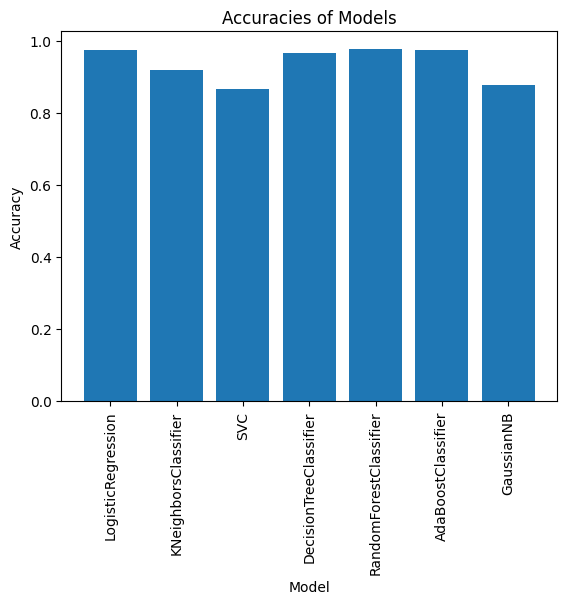

In [ ]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index, Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show()